Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix,accuracy_score, precision_score, recall_score

In [ ]:
data= pd.read_csv('heart_failure_missing_values.csv')
data

,Unnamed: 0,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,0,75.0,no,582,no,20,yes,265000.00,1.9,130.0,yes,no,4,1
1,1,55.0,no,7861,no,38,no,263358.03,1.1,136.0,yes,no,6,1
2,2,65.0,no,146,no,20,no,162000.00,1.3,129.0,yes,yes,7,1
3,3,50.0,yes,111,no,20,no,210000.00,1.9,137.0,yes,no,7,1
4,4,65.0,yes,160,yes,20,no,327000.00,2.7,116.0,no,no,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,294,62.0,no,61,yes,38,yes,155000.00,1.1,143.0,yes,yes,270,0
295,295,55.0,no,1820,no,38,no,270000.00,1.2,139.0,no,no,271,0
296,296,45.0,no,2060,yes,60,no,742000.00,0.8,138.0,no,no,278,0
297,297,45.0,no,2413,no,38,no,140000.00,1.4,140.0,yes,yes,280,0


In [ ]:
data.drop(data.iloc[:, 0:1],axis=1,inplace=True)

In [ ]:
data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   2
serum_creatinine            0
serum_sodium                2
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

Dealing with null values

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy= 'median')
imputer.fit(data[['platelets'] ])
data[['platelets']]= imputer.transform(data[['platelets']])

imputer = SimpleImputer(missing_values=np.nan, strategy= 'mean')
imputer.fit(data[['serum_sodium'] ])
data[['serum_sodium']]= imputer.transform(data[['serum_sodium']])

Encoding catagorical values

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

data['anaemia']= le.fit_transform(data['anaemia'].values)
data['diabetes']= le.fit_transform(data['diabetes'].values)
data['high_blood_pressure']= le.fit_transform(data['high_blood_pressure'].values)
data['sex']= le.fit_transform(data['sex'].values)
data['smoking']= le.fit_transform(data['smoking'].values)

                               age   anaemia  creatinine_phosphokinase  \
age                       1.000000  0.088006                 -0.081584   
anaemia                   0.088006  1.000000                 -0.190741   
creatinine_phosphokinase -0.081584 -0.190741                  1.000000   
diabetes                 -0.101012 -0.012729                 -0.009639   
ejection_fraction         0.060098  0.031557                 -0.044080   
high_blood_pressure       0.093289  0.038182                 -0.070590   
platelets                -0.052923 -0.040137                  0.022706   
serum_creatinine          0.159187  0.052174                 -0.016408   
serum_sodium             -0.045632  0.046095                  0.060953   
sex                       0.065430 -0.094769                  0.079791   
smoking                   0.018668 -0.107290                  0.002421   
time                     -0.224068 -0.141414                 -0.009346   
DEATH_EVENT               0.253729  0.

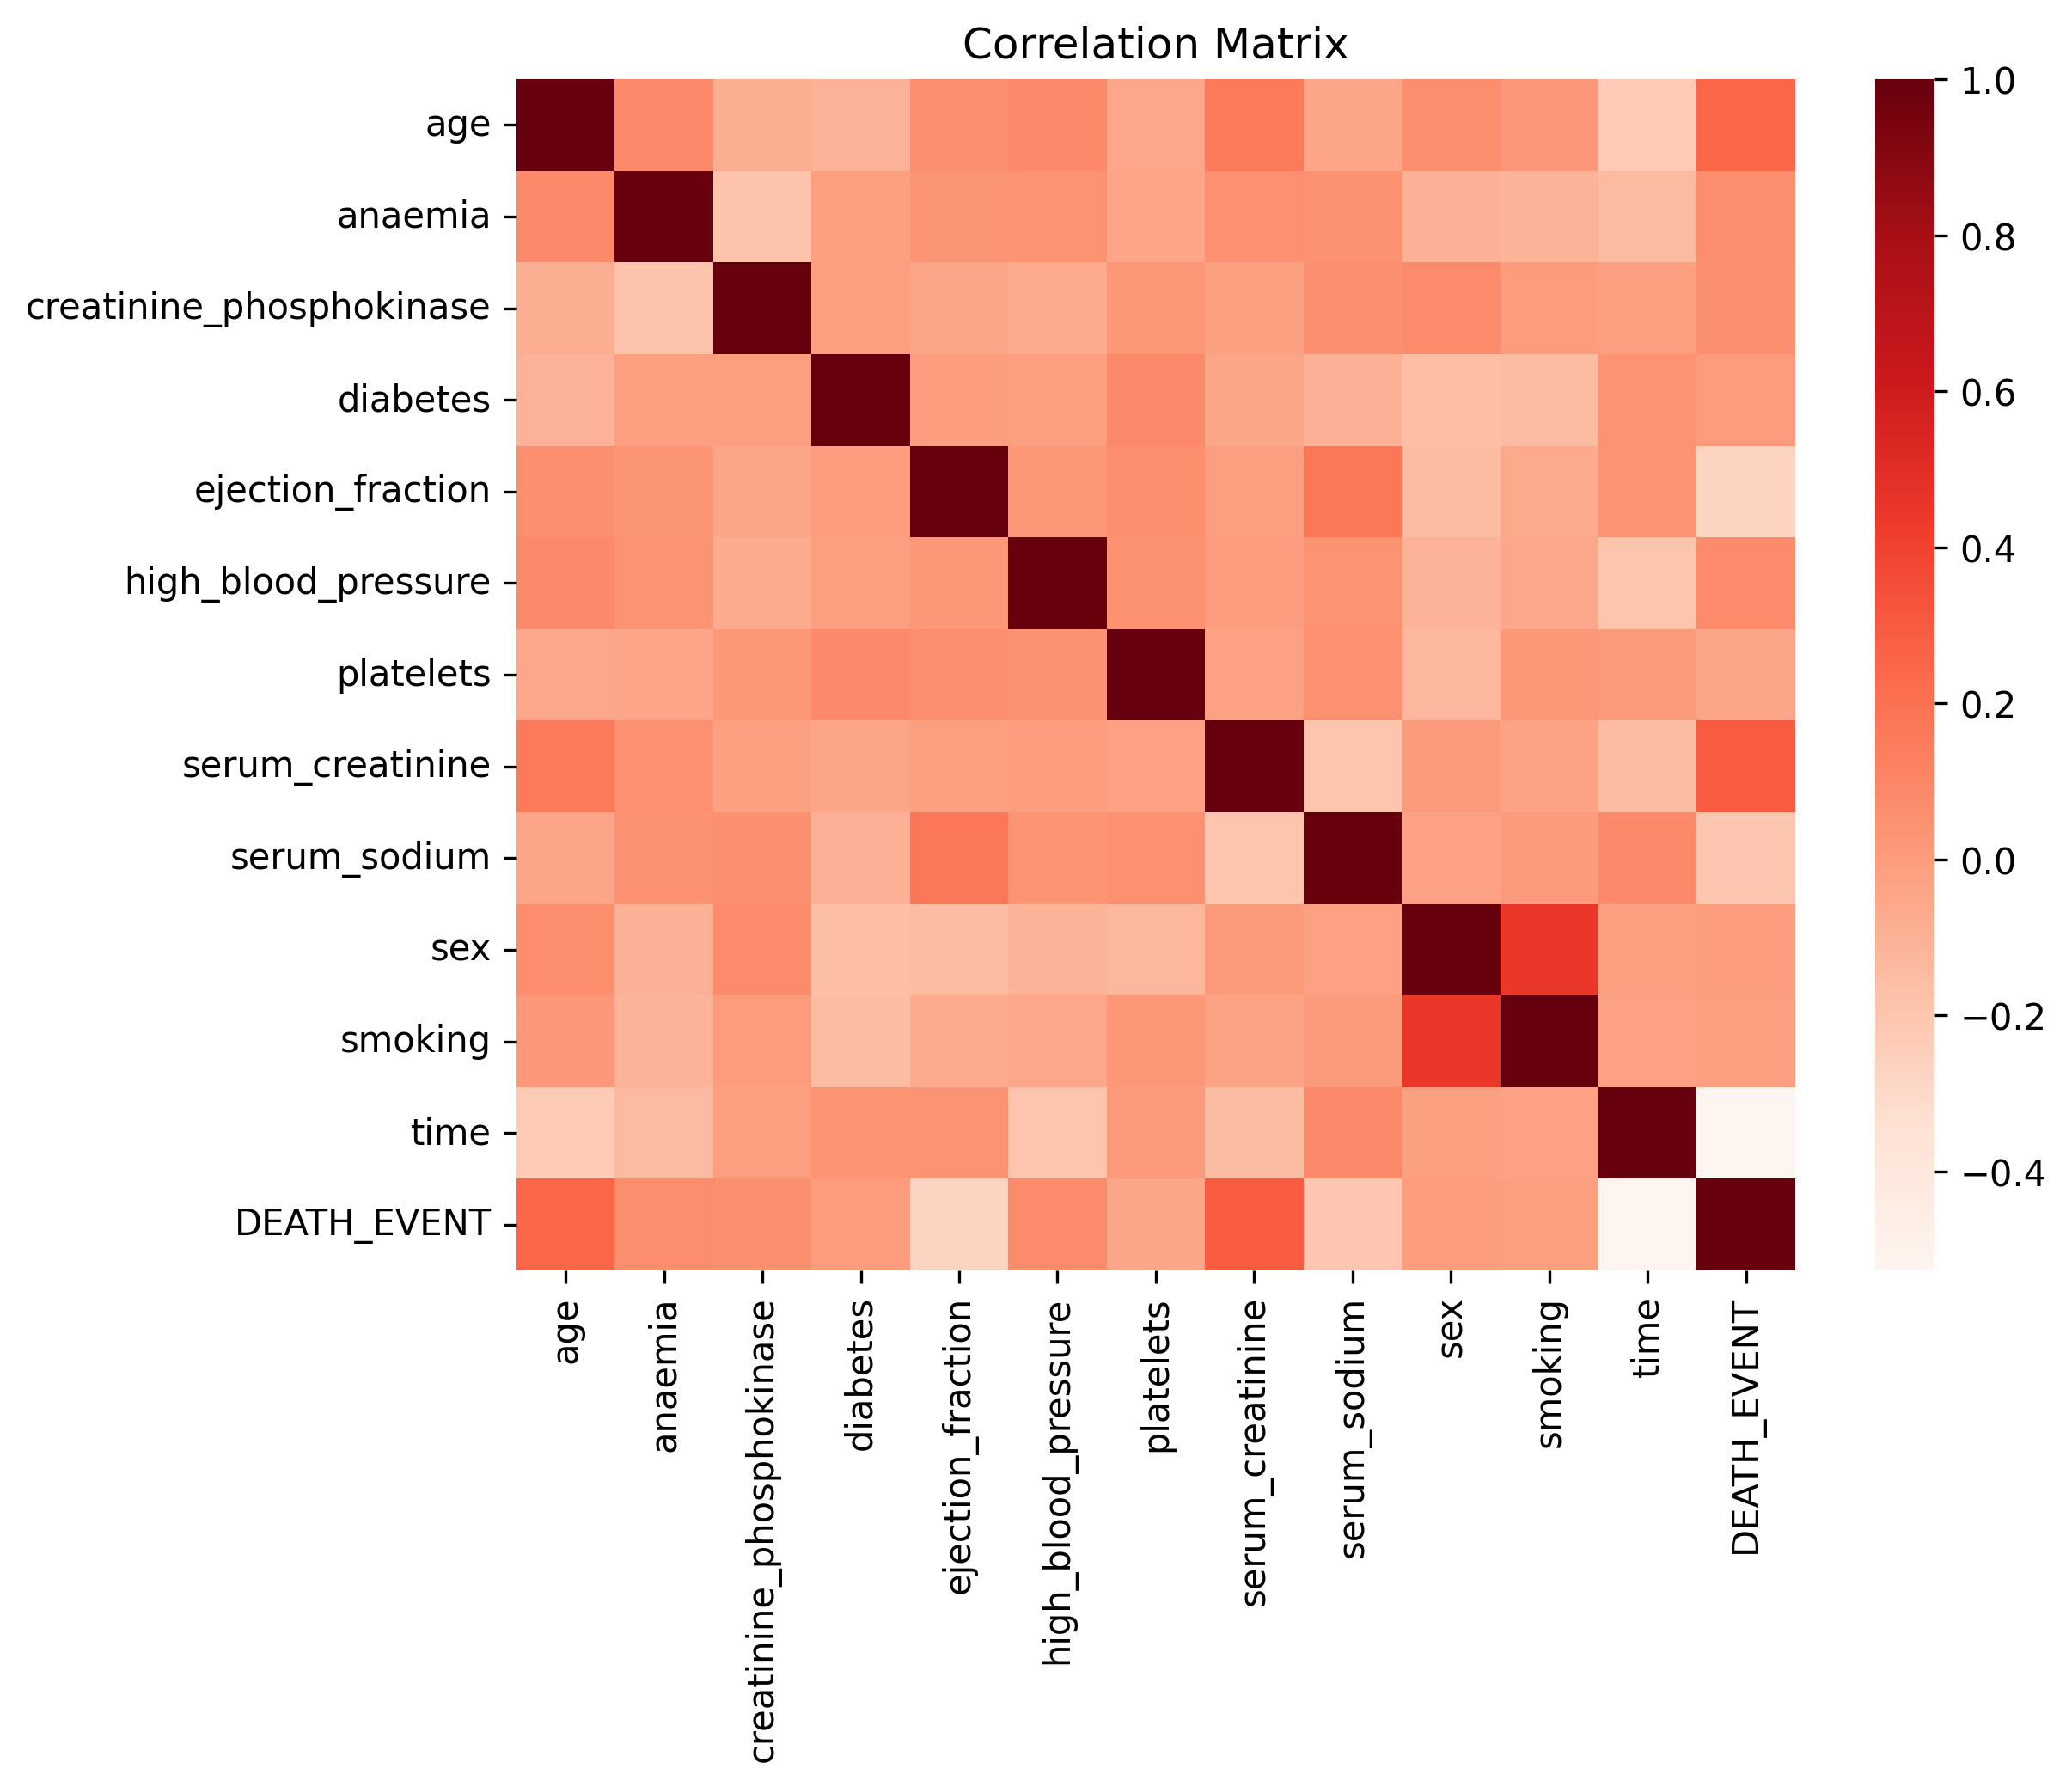

In [ ]:
correlation_matrix = data.corr()


print(correlation_matrix)


plt.figure(figsize=(8, 6), dpi=300)
sns.heatmap(correlation_matrix, cmap="Reds")
plt.title("Correlation Matrix")
plt.show()

In [ ]:
#data.drop(['time'],axis=1,inplace=True)

In [ ]:
X= data.drop(['DEATH_EVENT'],axis=1)
y= data['DEATH_EVENT']

In [ ]:
X

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130.0,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136.0,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129.0,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137.0,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116.0,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143.0,1,1,270
295,55.0,0,1820,0,38,0,270000.00,1.2,139.0,0,0,271
296,45.0,0,2060,1,60,0,742000.00,0.8,138.0,0,0,278
297,45.0,0,2413,0,38,0,140000.00,1.4,140.0,1,1,280


Train test split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [ ]:
from sklearn.linear_model import LogisticRegression
lrClassifier = LogisticRegression(max_iter=10000)
lrClassifier.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [ ]:
lrClassifier.score(X_test, y_test)

0.8222222222222222

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knnClassifier = KNeighborsClassifier(n_neighbors=5)
knnClassifier.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
knnClassifier.score(X_test,y_test)

0.6222222222222222

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtClassifier = DecisionTreeClassifier()
dtClassifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
dtClassifier.score(X_test,y_test)

0.8

In [ ]:
from sklearn.svm import SVC
svcClassifier = SVC()
svcClassifier.fit(X_train, y_train)

SVC()

In [ ]:
svcClassifier.score(X_test,y_test)

0.7111111111111111

In [ ]:
from sklearn.naive_bayes import GaussianNB

nbClassifier = GaussianNB()
nbClassifier.fit(X_train, y_train)

GaussianNB()

In [ ]:
nbClassifier.score(X_test, y_test)

0.8444444444444444

Confusion Matrix:
 [[57  7]
 [ 9 17]]
Accuracy: 0.8222222222222222
Precision: 0.7083333333333334
Recall: 0.6538461538461539


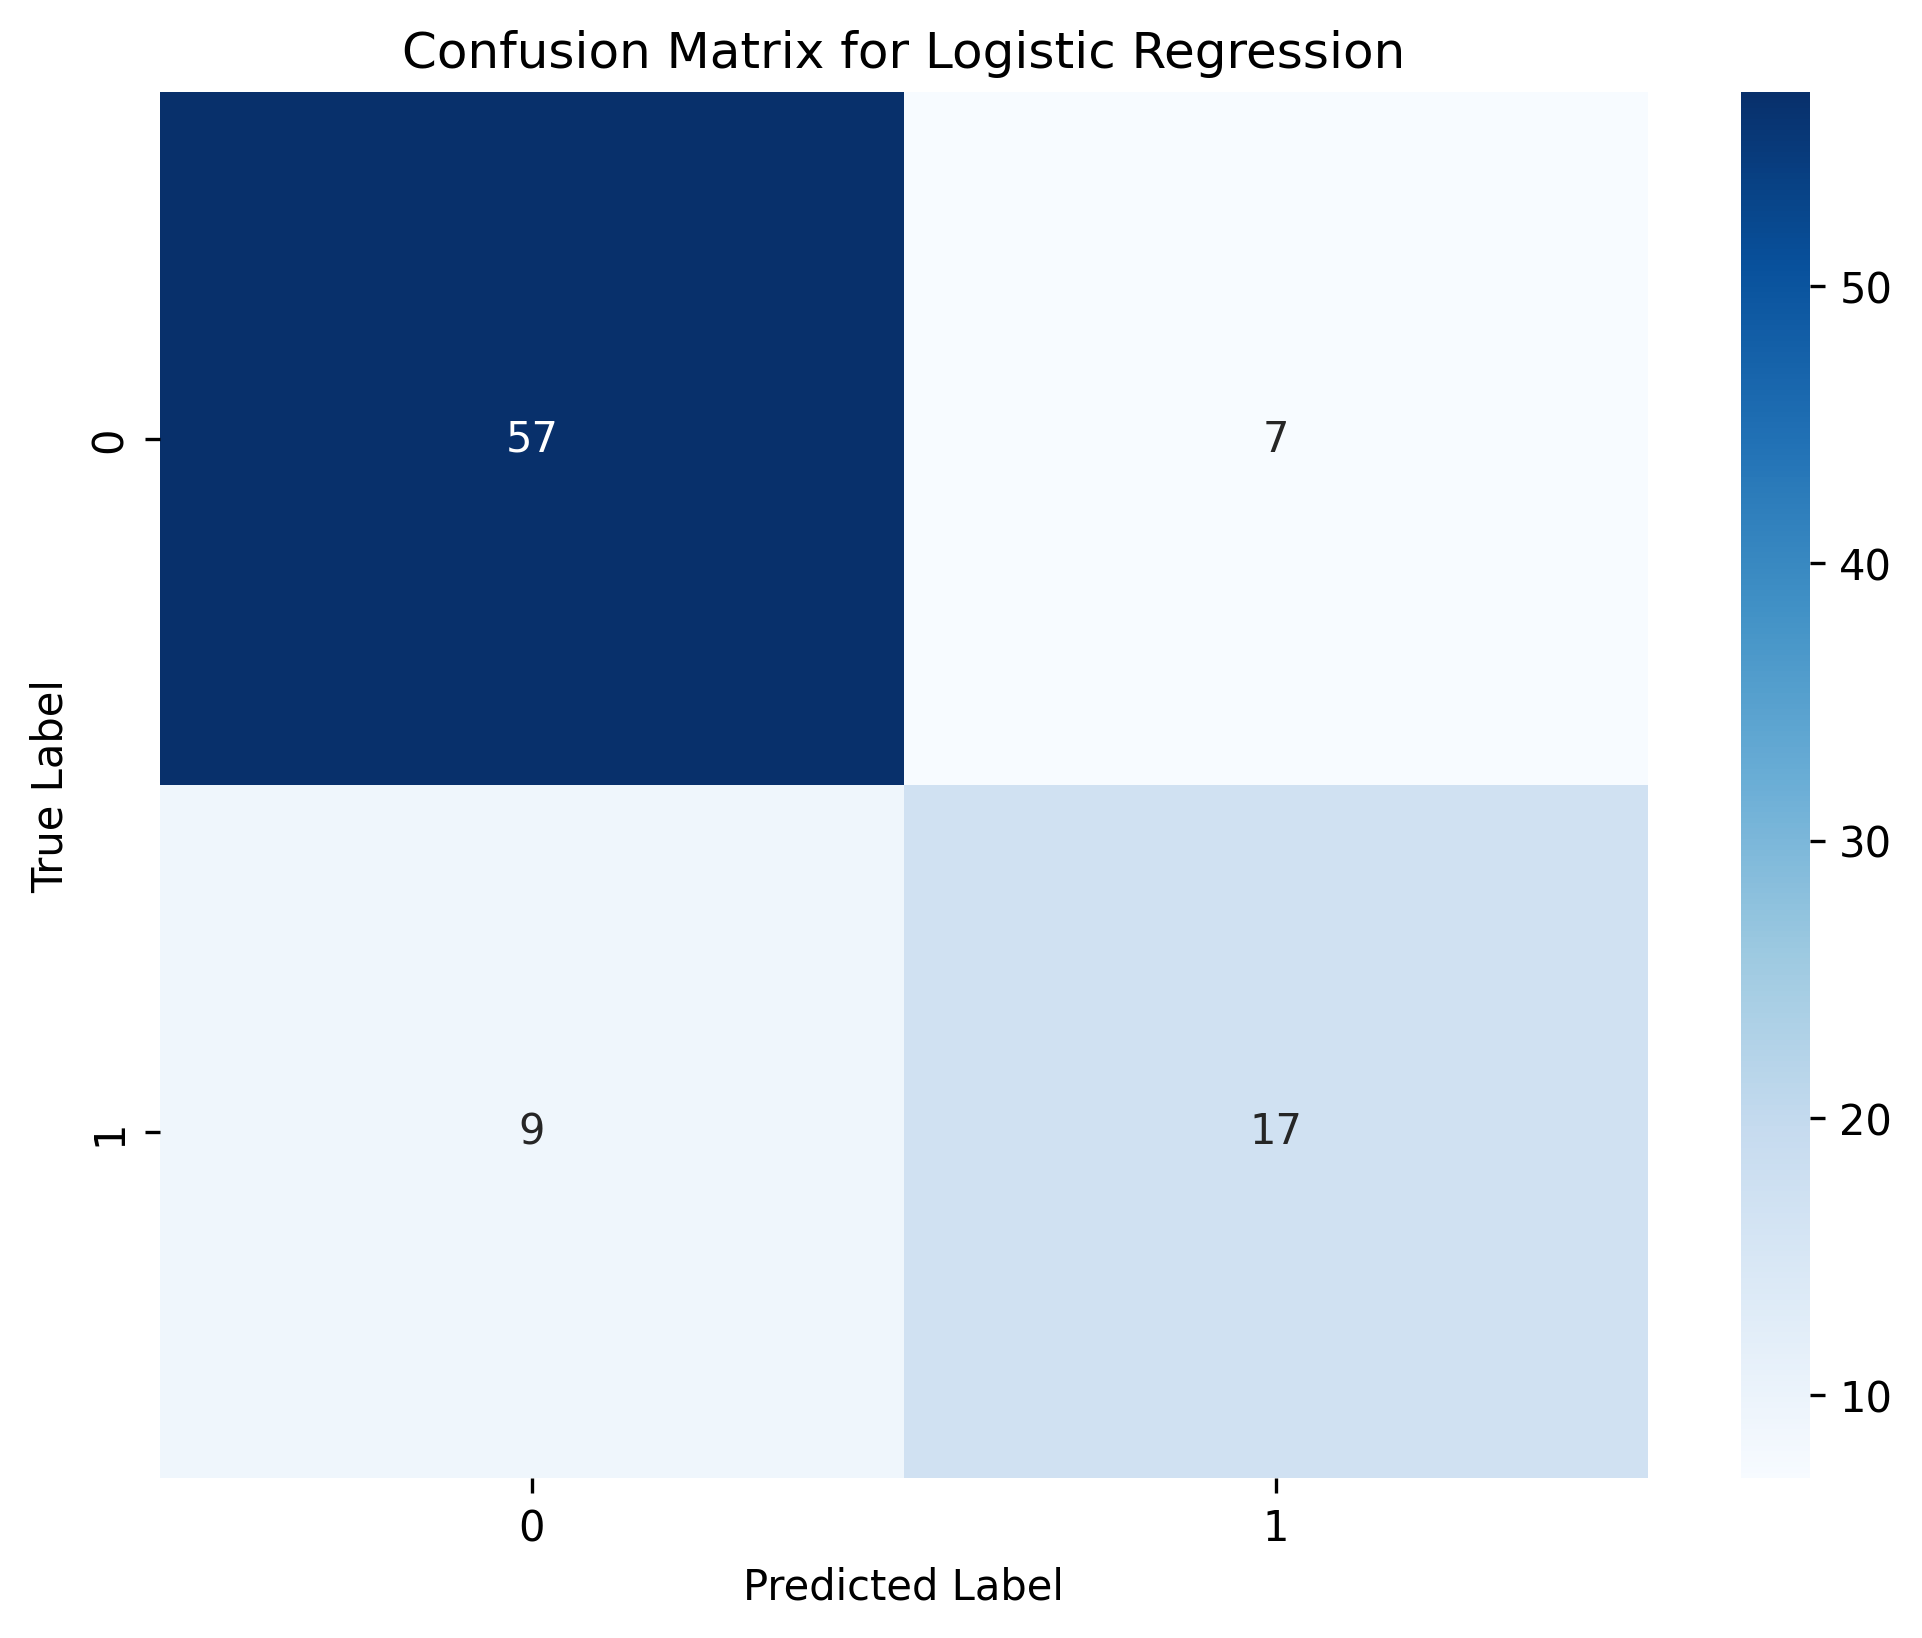

In [ ]:

# Making predictions using our model
y_pred = lrClassifier.predict(X_test)

# Generating the confusion matrix
cm = confusion_matrix(y_test, y_pred)

print('Confusion Matrix:\n',cm)

lrAccuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", lrAccuracy)
print("Precision:", precision)
print("Recall:", recall)

# Ploting the confusion matrix
plt.figure(figsize=(8, 6),dpi=300)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Confusion Matrix:
 [[53 11]
 [23  3]]
Accuracy: 0.6222222222222222
Precision: 0.21428571428571427
Recall: 0.11538461538461539


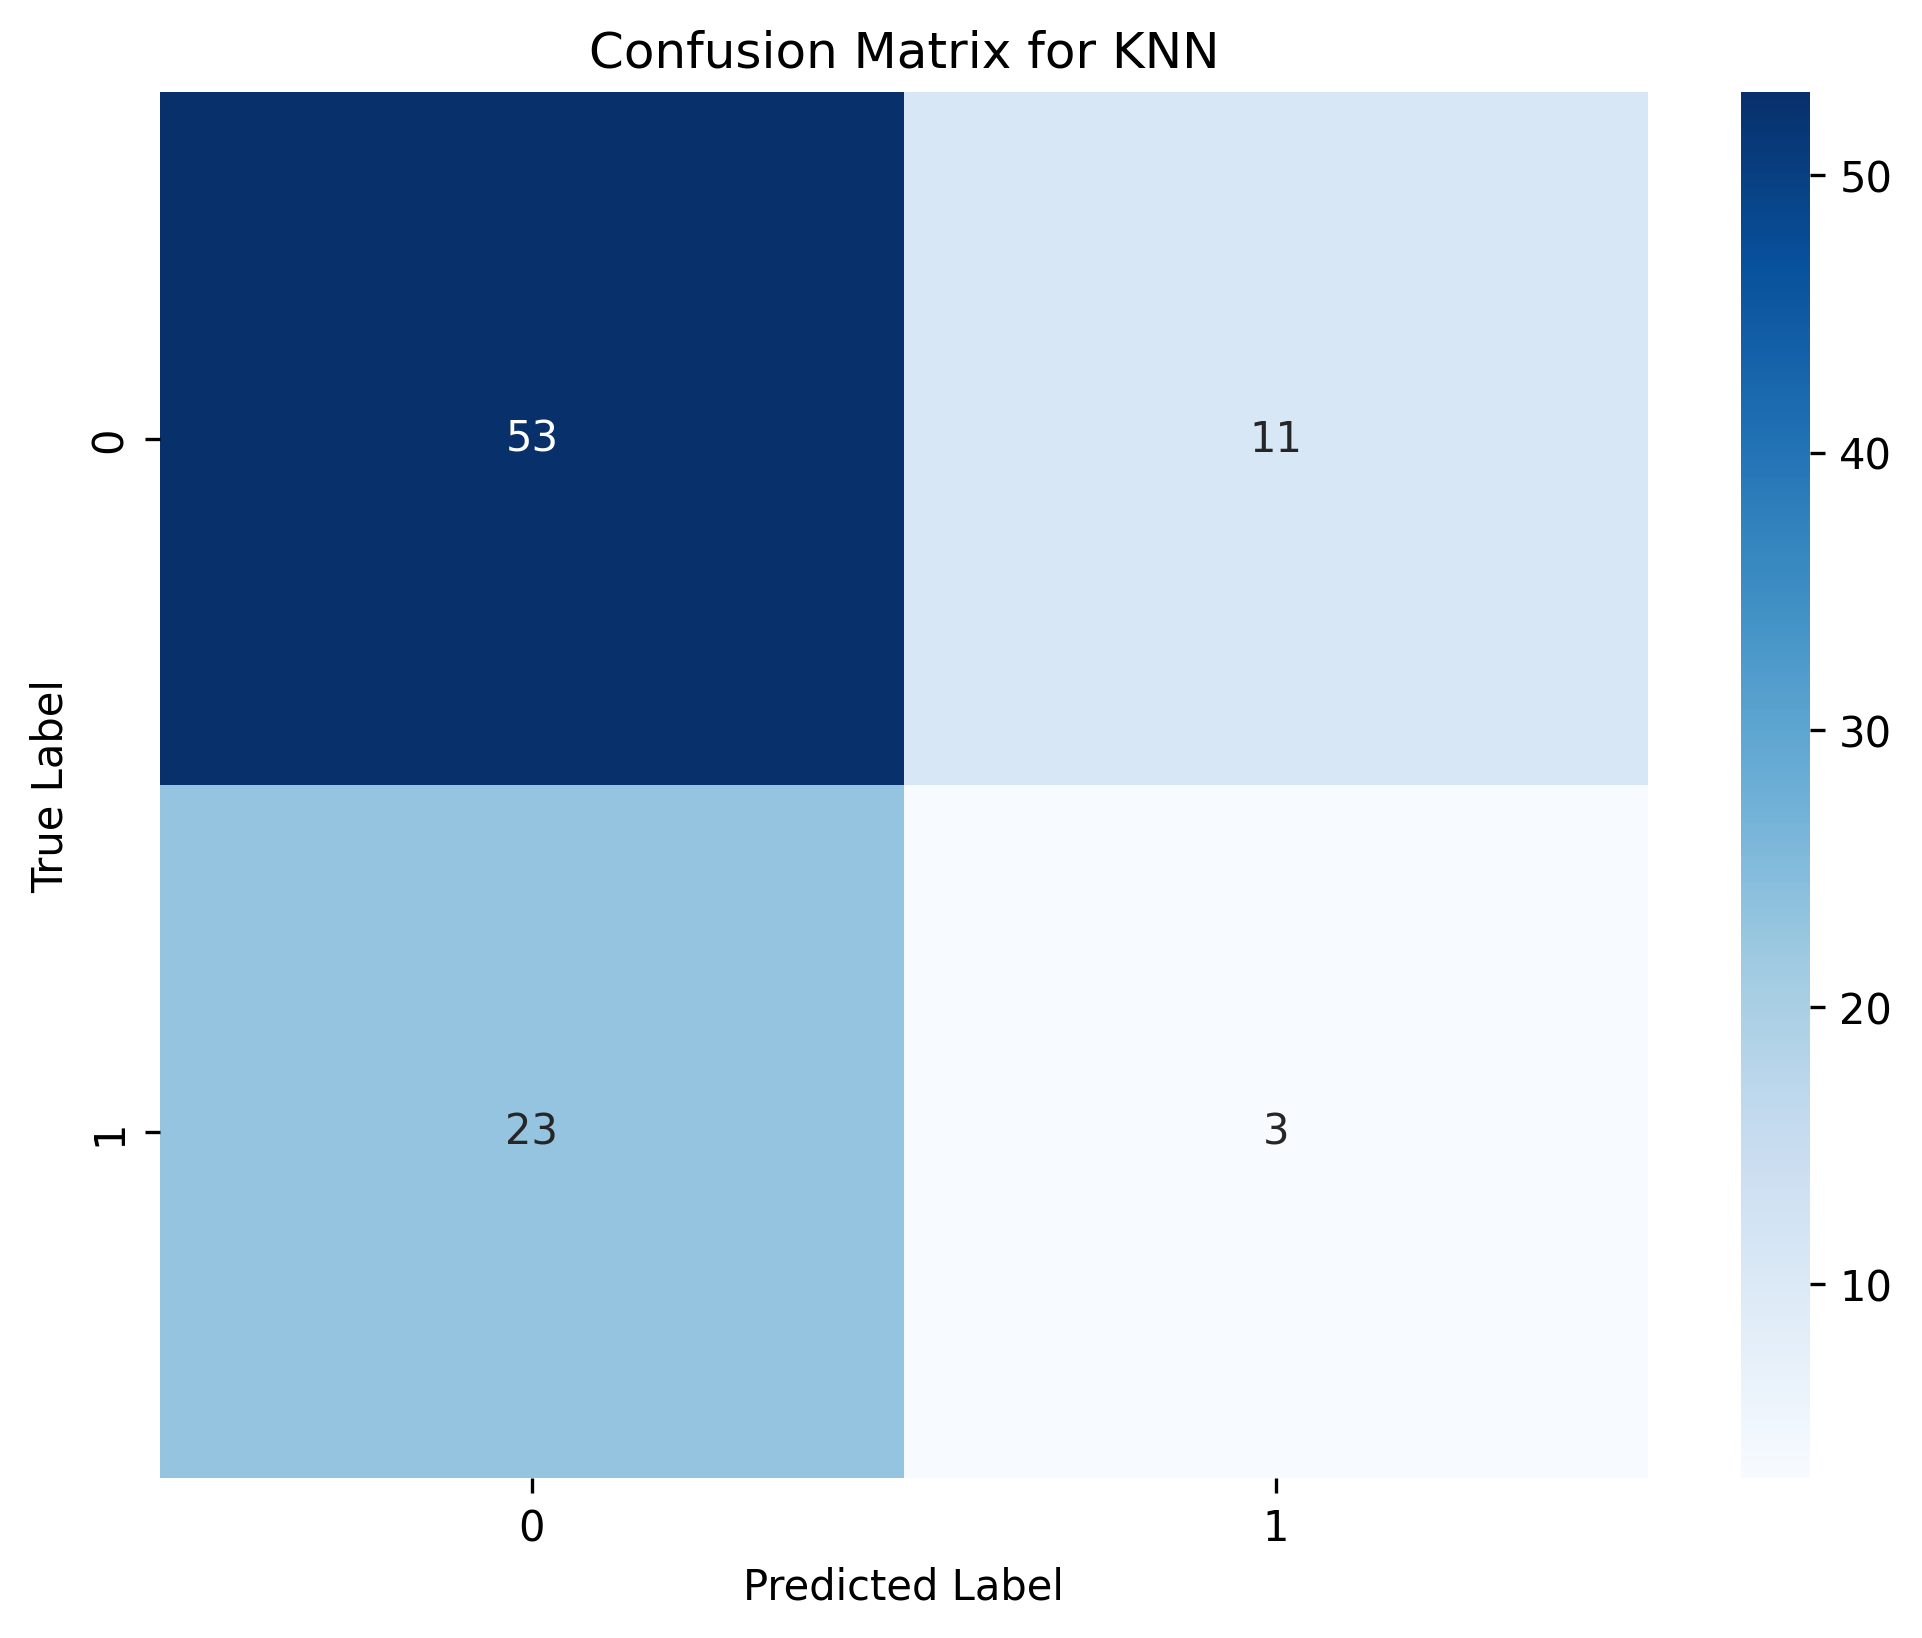

In [ ]:
# Making predictions using our model
y_pred = knnClassifier.predict(X_test)

# Generating the confusion matrix
cm = confusion_matrix(y_test, y_pred)

print('Confusion Matrix:\n',cm)

knnAccuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", knnAccuracy)
print("Precision:", precision)
print("Recall:", recall)

# Ploting the confusion matrix
plt.figure(figsize=(8, 6),dpi=300)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for KNN")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Confusion Matrix:
 [[55  9]
 [ 9 17]]
Accuracy: 0.8
Precision: 0.6538461538461539
Recall: 0.6538461538461539


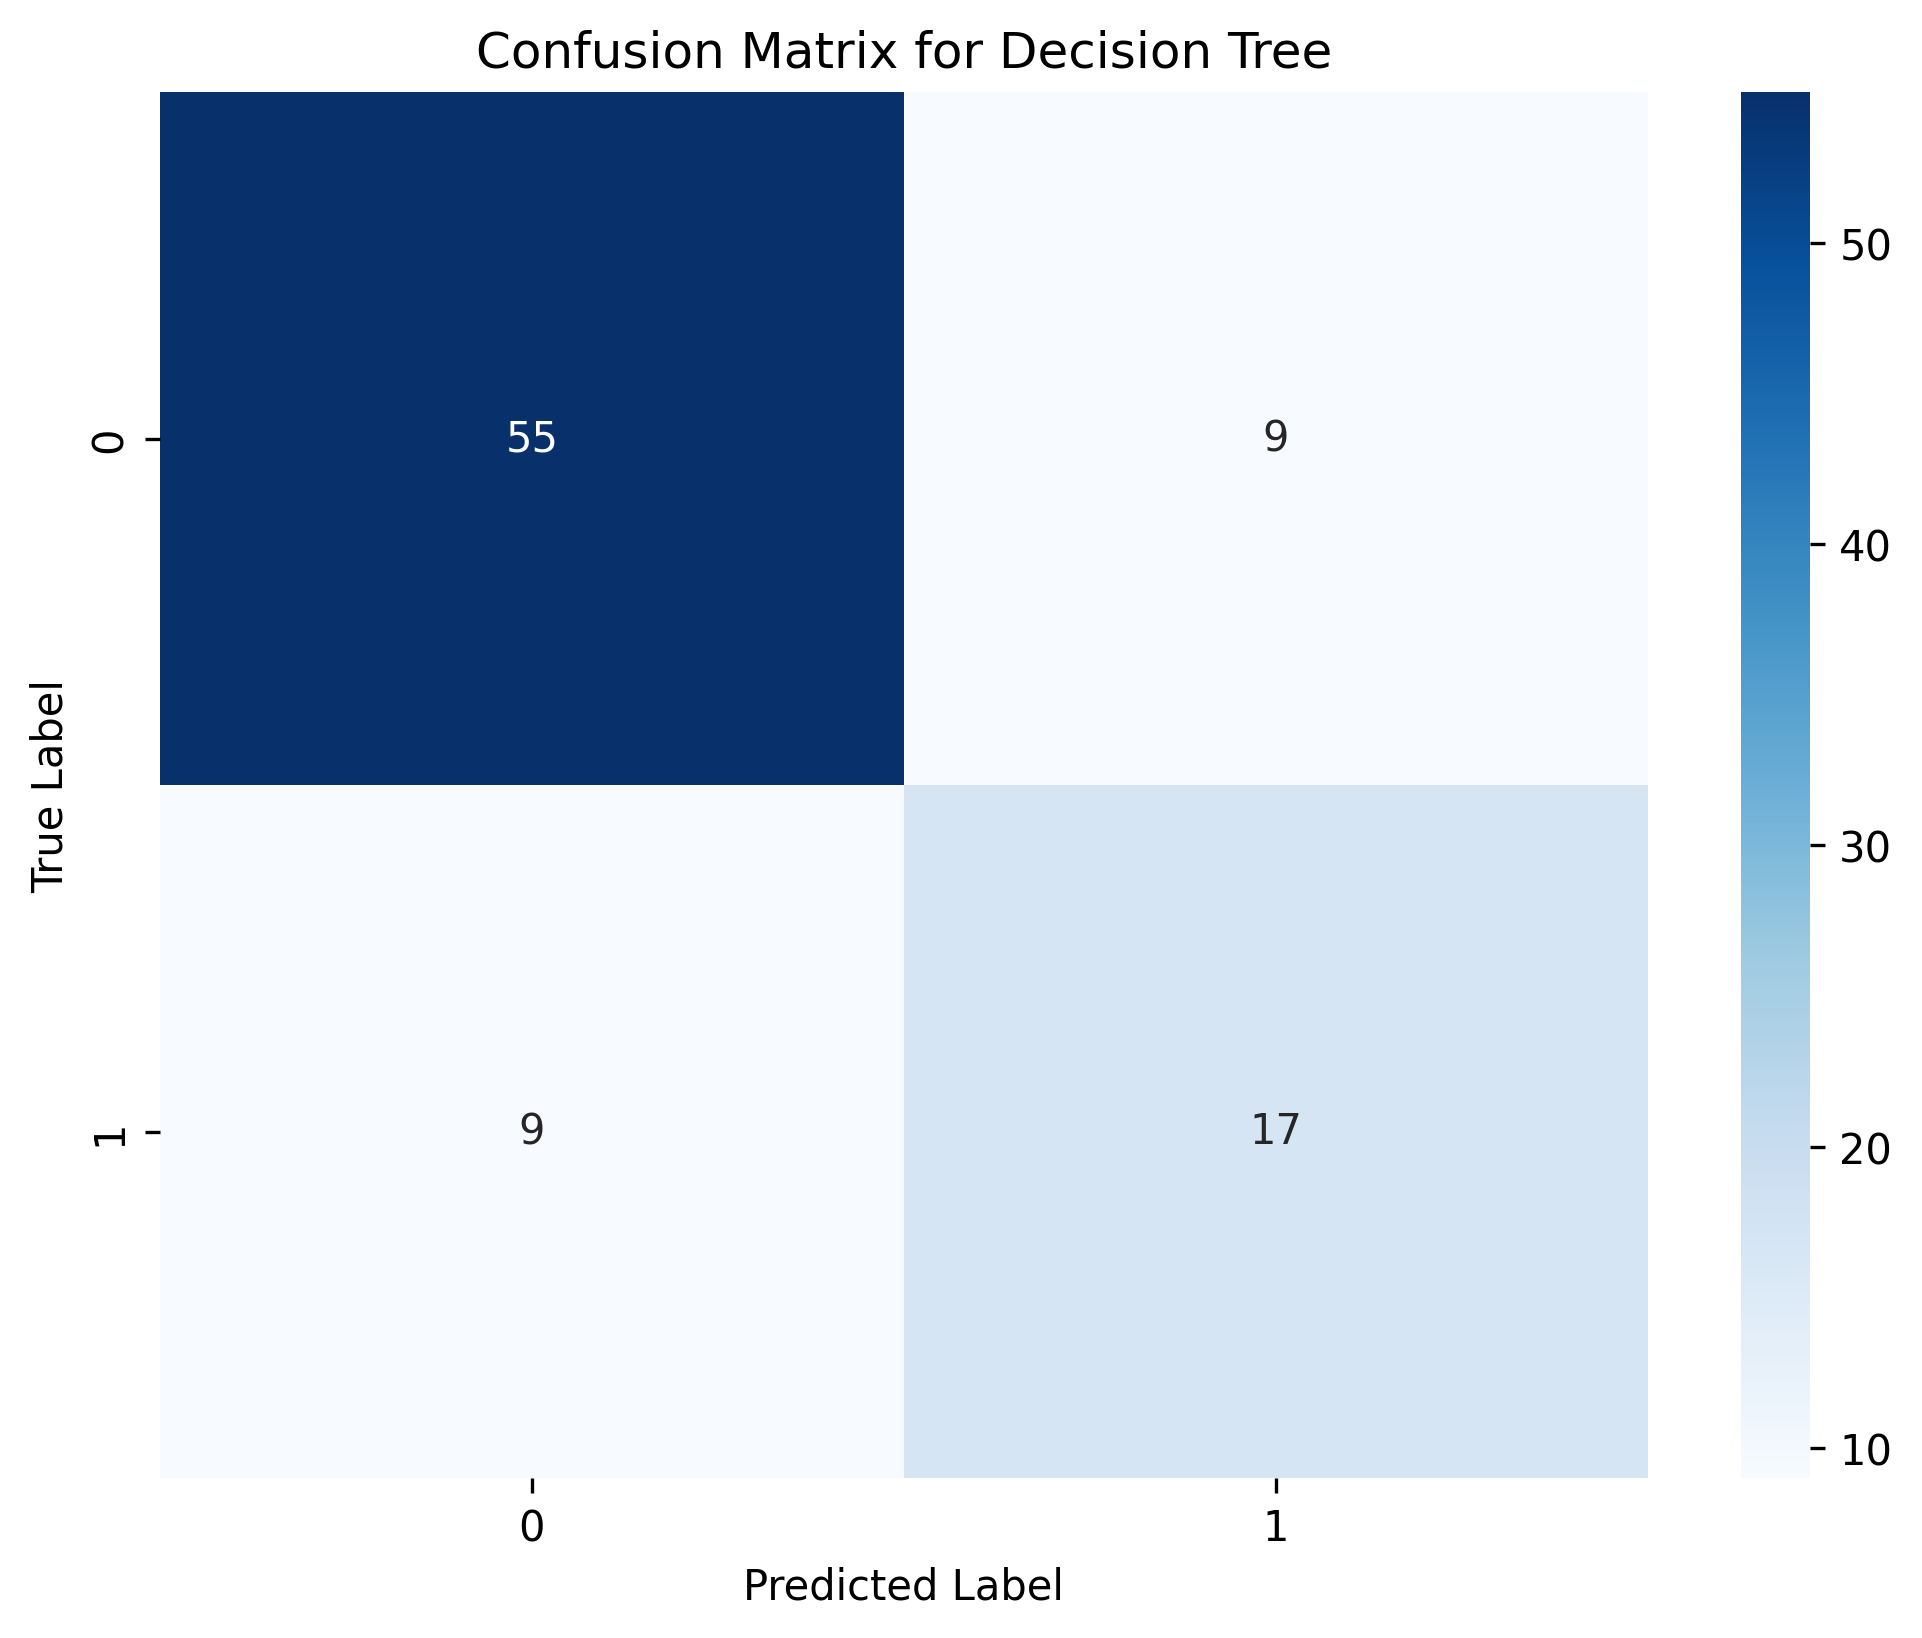

In [ ]:
# Making predictions using our model
y_pred = dtClassifier.predict(X_test)

# Generating the confusion matrix
cm = confusion_matrix(y_test, y_pred)

print('Confusion Matrix:\n',cm)

dtAccuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", dtAccuracy)
print("Precision:", precision)
print("Recall:", recall)

# Ploting the confusion matrix
plt.figure(figsize=(8, 6),dpi=300)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for Decision Tree")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Confusion Matrix:
 [[64  0]
 [26  0]]
Accuracy: 0.7111111111111111
Precision: 1.0
Recall: 0.0


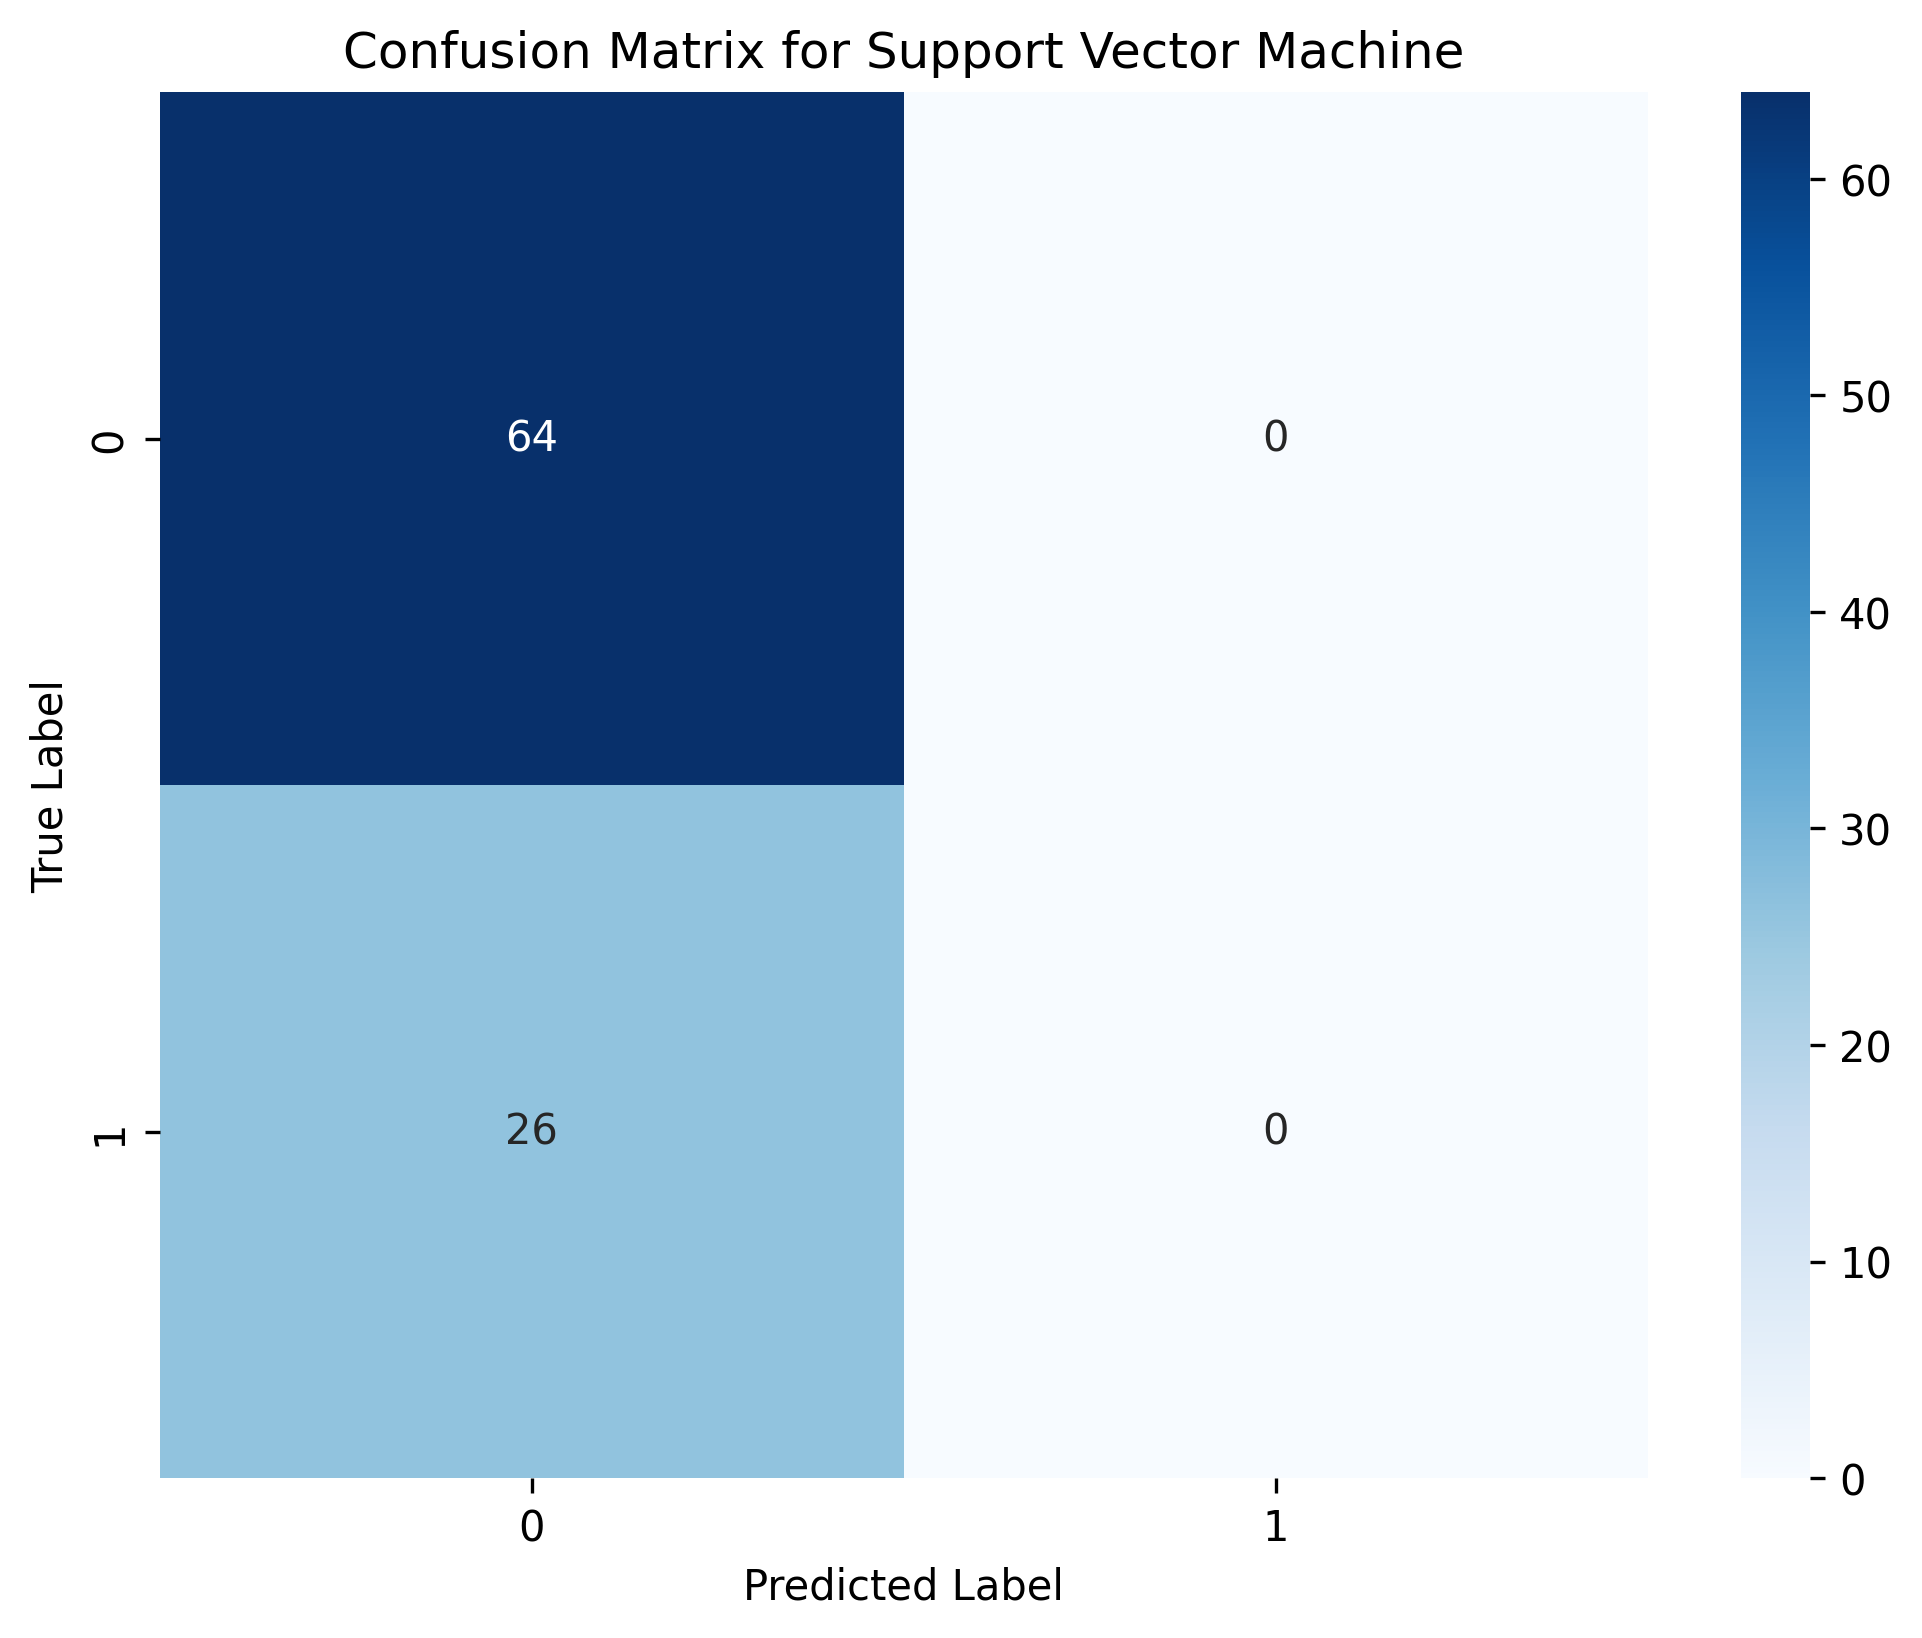

In [ ]:
# Making predictions using our model
y_pred = svcClassifier.predict(X_test)

# Generating the confusion matrix
cm = confusion_matrix(y_test, y_pred)

print('Confusion Matrix:\n',cm)

svcAccuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=1)
recall = recall_score(y_test, y_pred)

print("Accuracy:", svcAccuracy)
print("Precision:", precision)
print("Recall:", recall)

# Ploting the confusion matrix
plt.figure(figsize=(8, 6),dpi=300)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for Support Vector Machine")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Confusion Matrix:
 [[61  3]
 [11 15]]
Accuracy: 0.8444444444444444
Precision: 0.8333333333333334
Recall: 0.5769230769230769


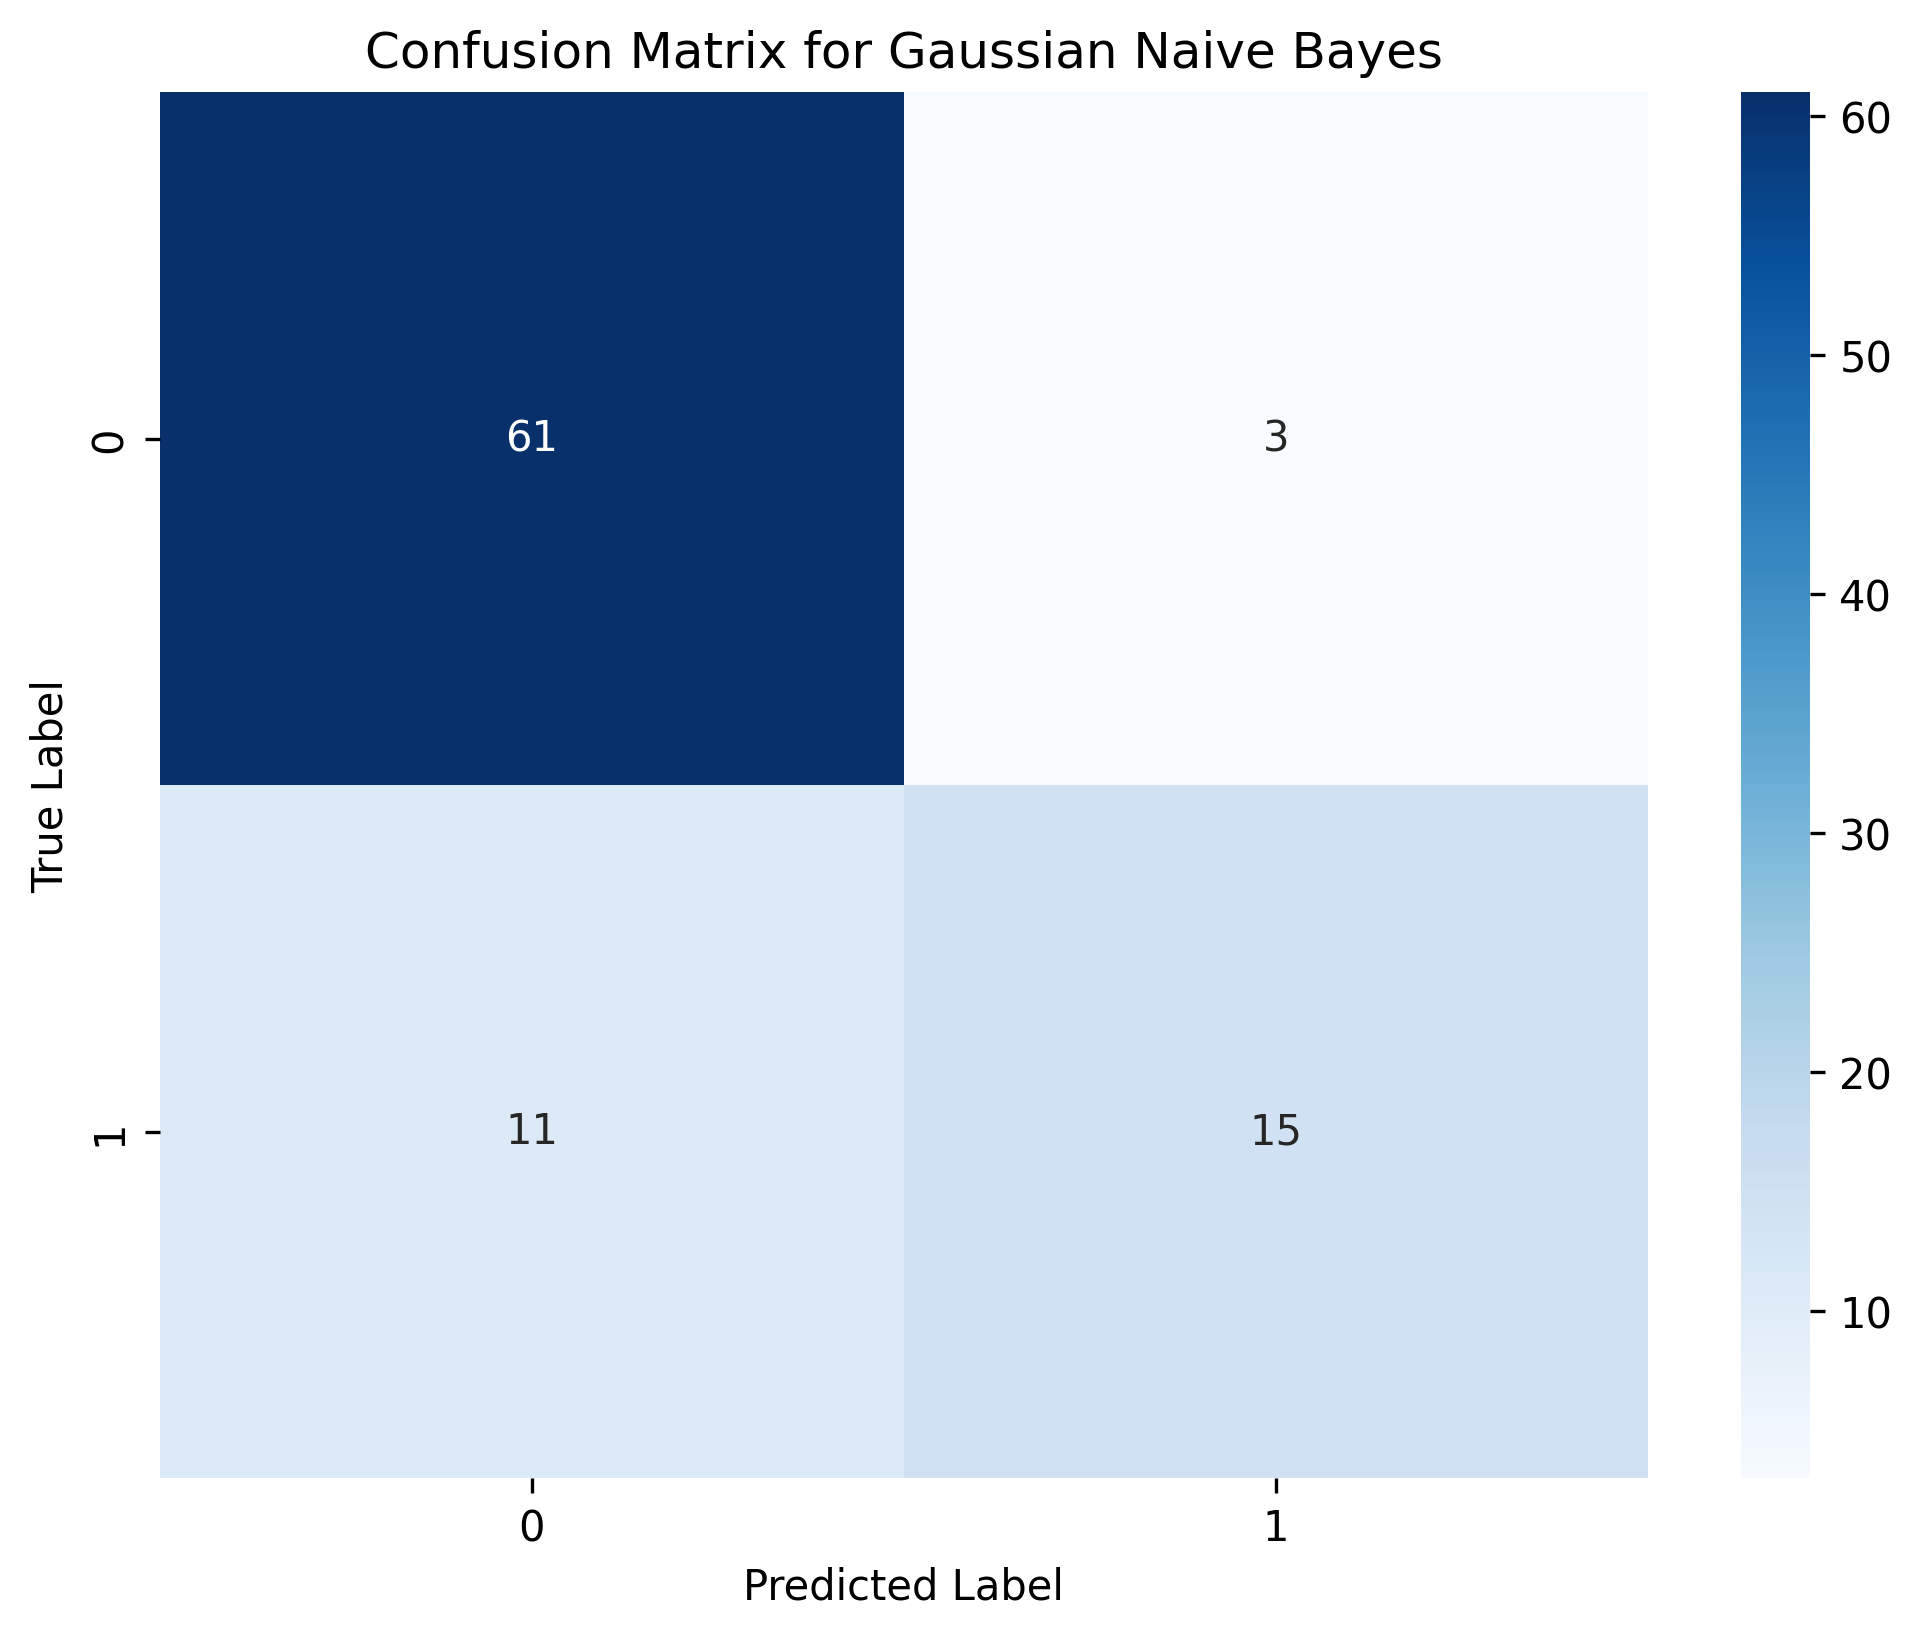

In [ ]:
# Making predictions using our model
y_pred = nbClassifier.predict(X_test)

# Generating the confusion matrix
cm = confusion_matrix(y_test, y_pred)

print('Confusion Matrix:\n',cm)

nbAccuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", nbAccuracy)
print("Precision:", precision)
print("Recall:", recall)

# Ploting the confusion matrix
plt.figure(figsize=(8, 6),dpi=300)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for Gaussian Naive Bayes")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

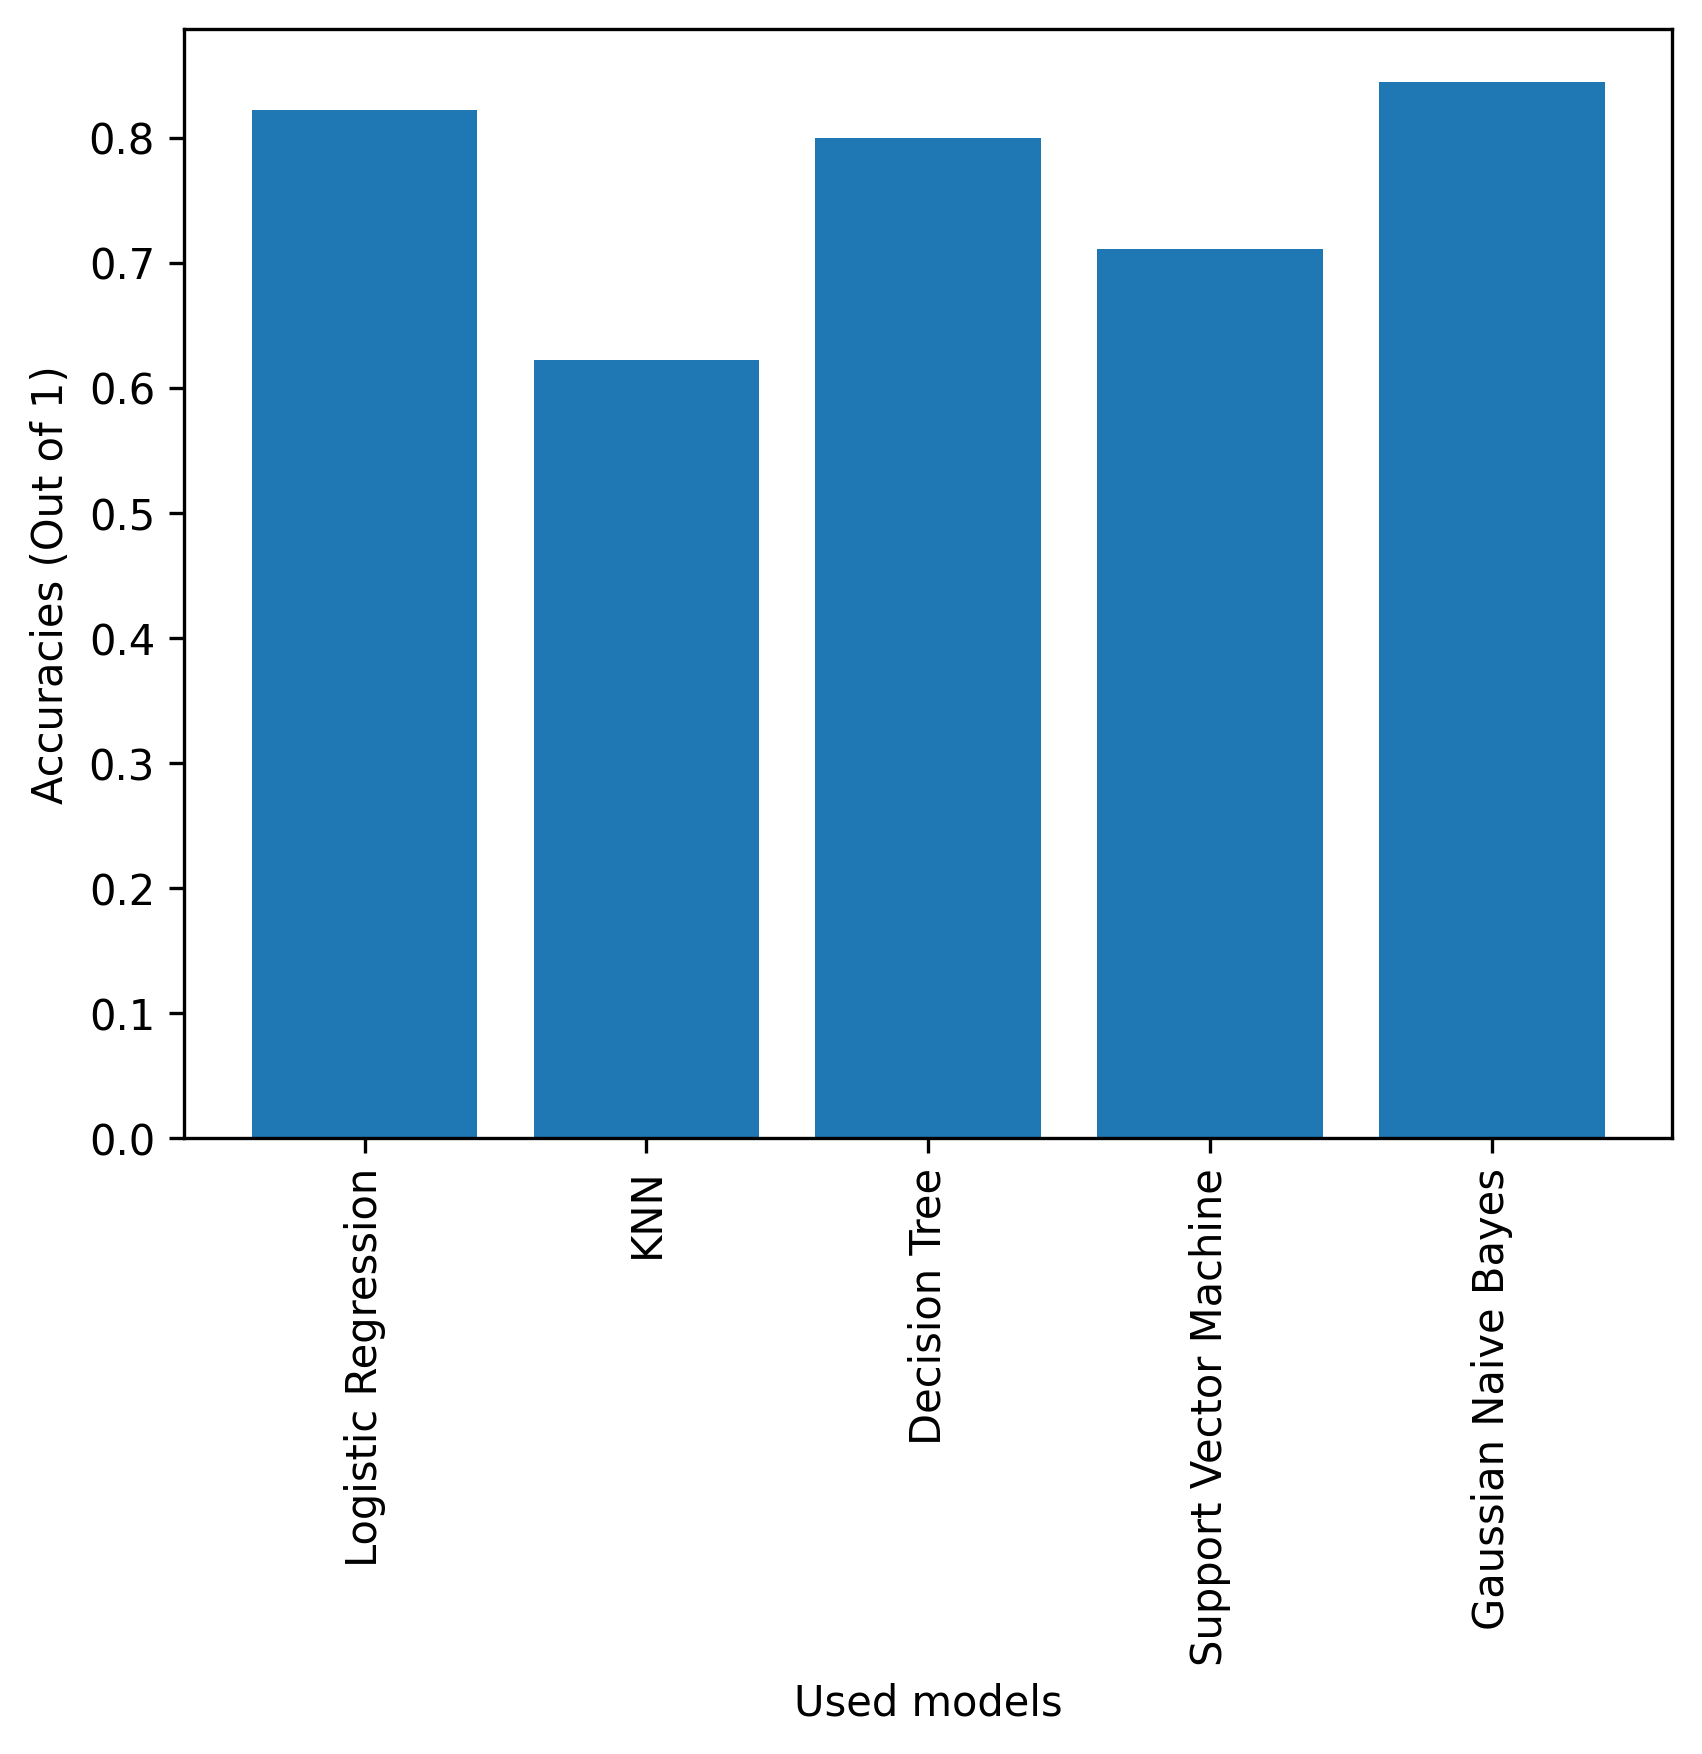

In [ ]:
accuracies=[lrAccuracy, knnAccuracy,dtAccuracy,svcAccuracy,nbAccuracy]
models= ['Logistic Regression','KNN','Decision Tree','Support Vector Machine','Gaussian Naive Bayes']

plt.figure(dpi=300)
plt.bar(models, accuracies)
plt.xlabel("Used models")
plt.ylabel("Accuracies (Out of 1)")
plt.xticks(rotation=90)
plt.show()